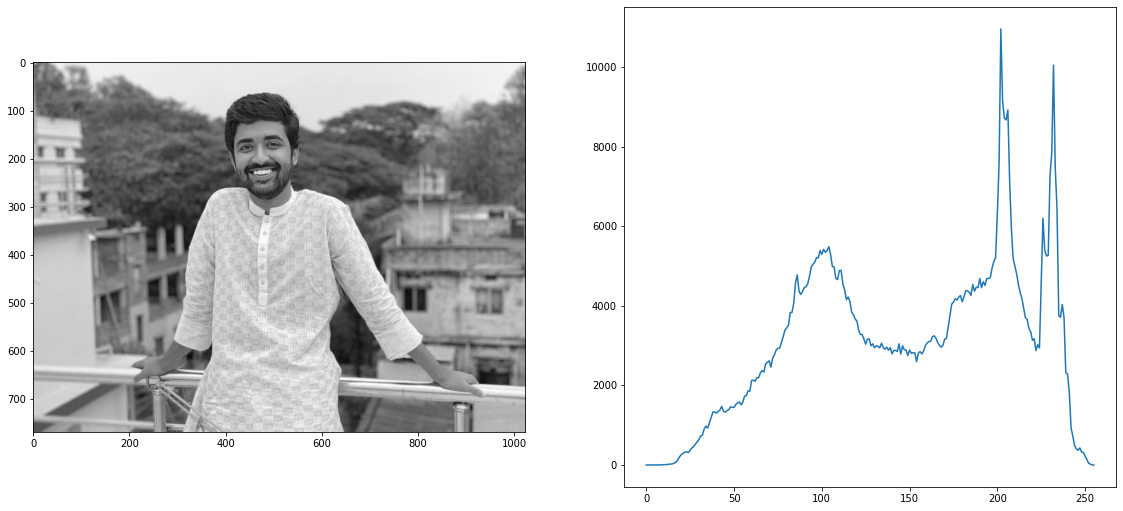

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec

filepath = 'jawad.jpg'

# load image
imageObj = cv2.imread(filepath)
img=cv2.cvtColor(imageObj,cv2.COLOR_BGR2RGB)
img=cv2.cvtColor(imageObj,cv2.COLOR_RGB2GRAY)

hist = cv2.calcHist([img], [0], None, [256], [0,256])
img_eq = cv2.equalizeHist(img)
hist_eq = cv2.calcHist([img_eq], [0], None, [256], [0,256])


row = 3
col =3


#plotting image with the histogram
fig = plt.figure(figsize=(30,30))
gs = GridSpec(row, col)
fig.add_subplot(gs[0,0])
plt.imshow(img, cmap='gray')
fig.add_subplot(gs[0,1])
plt.plot(hist)


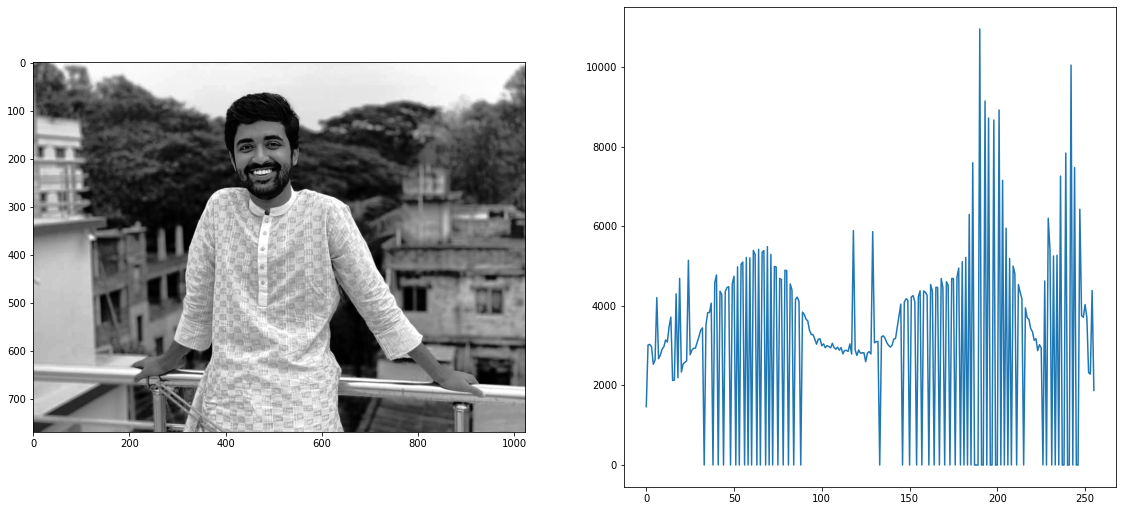

In [21]:
#plotting EQUALIZED images with the Equalized Histogram
fig = plt.figure(figsize=(30,30))
gs = GridSpec(row, col)
fig.add_subplot(gs[0,0])
plt.imshow(img_eq, cmap='gray')
fig.add_subplot(gs[0,1])
plt.plot(hist_eq)

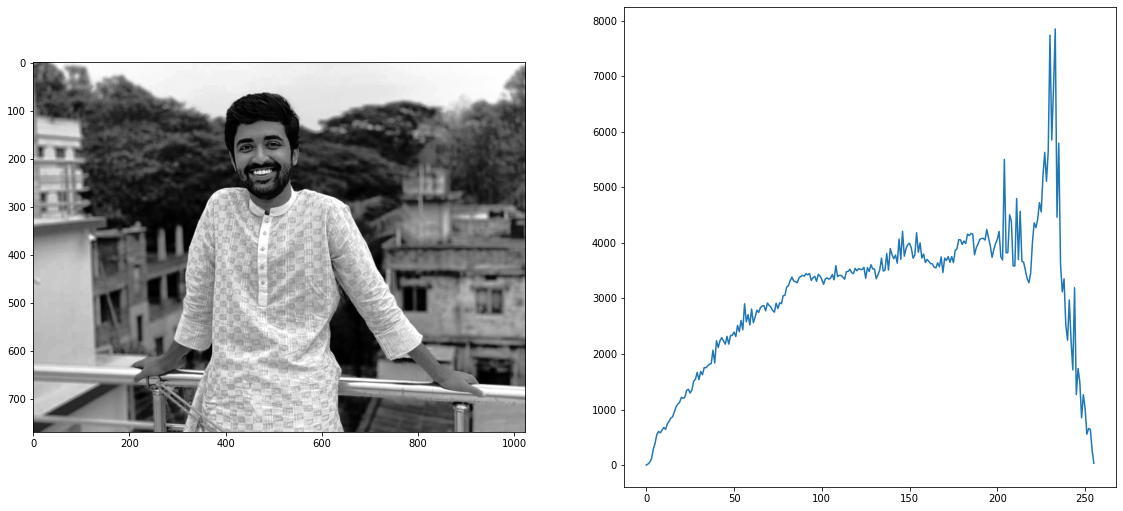

In [22]:
#adaptive image eqalization with adaptive histogram
cl = cv2.createCLAHE(2.0, (8,8))

img_ad_eq = cl.apply(img)
hist_ad_eq = cv2.calcHist([img_ad_eq], [0], None, [256], [0,256])

fig = plt.figure(figsize=(30,30))
gs = GridSpec(row, col)
fig.add_subplot(gs[0,0])
plt.imshow(img_eq, cmap='gray')
fig.add_subplot(gs[0,1])
plt.plot(hist_ad_eq)

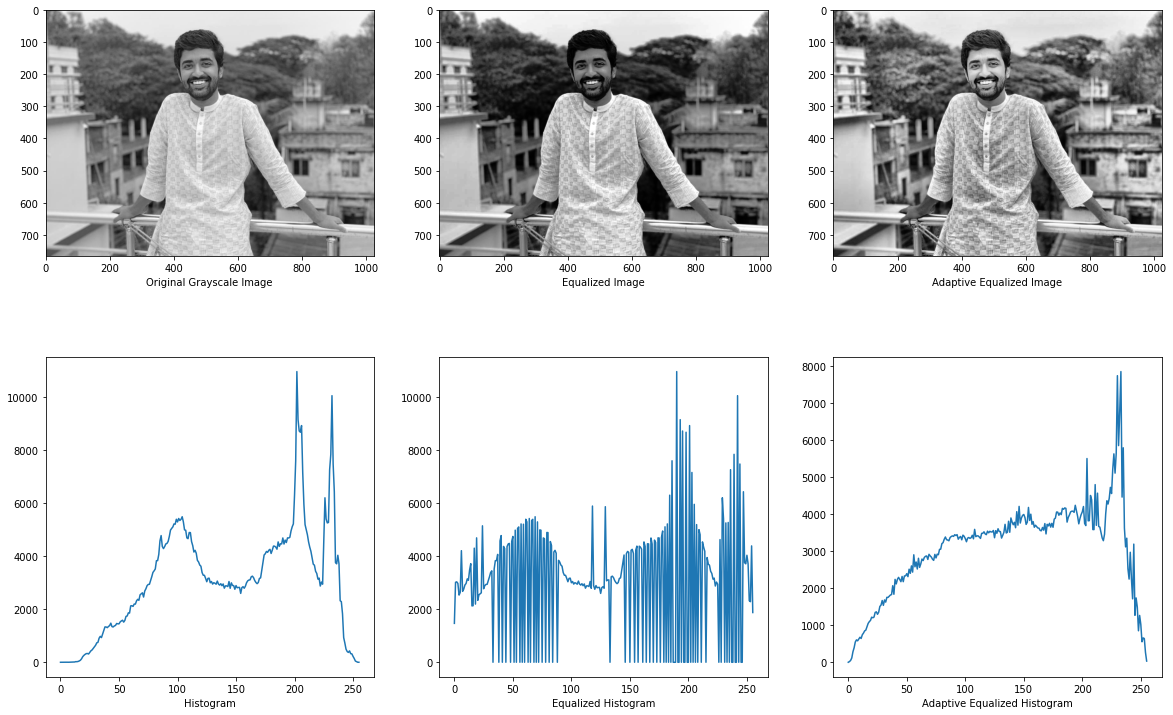

In [23]:
fig = plt.figure(figsize=(20,20))
gs = GridSpec(row, col)

fig.add_subplot(gs[0,0])
plt.xlabel('Original Grayscale Image')
plt.imshow(img, cmap='gray')

fig.add_subplot(gs[0,1])
plt.xlabel('Equalized Image')
plt.imshow(img_eq, cmap='gray')

fig.add_subplot(gs[0,2])
plt.xlabel('Adaptive Equalized Image')
plt.imshow(img_ad_eq, cmap='gray')

fig.add_subplot(gs[1,0])
plt.xlabel('Histogram')
plt.plot(hist)

fig.add_subplot(gs[1,1])
plt.xlabel('Equalized Histogram')
plt.plot(hist_eq)

fig.add_subplot(gs[1,2])
plt.xlabel('Adaptive Equalized Histogram')
plt.plot(hist_ad_eq)

plt.savefig('1.jpg')

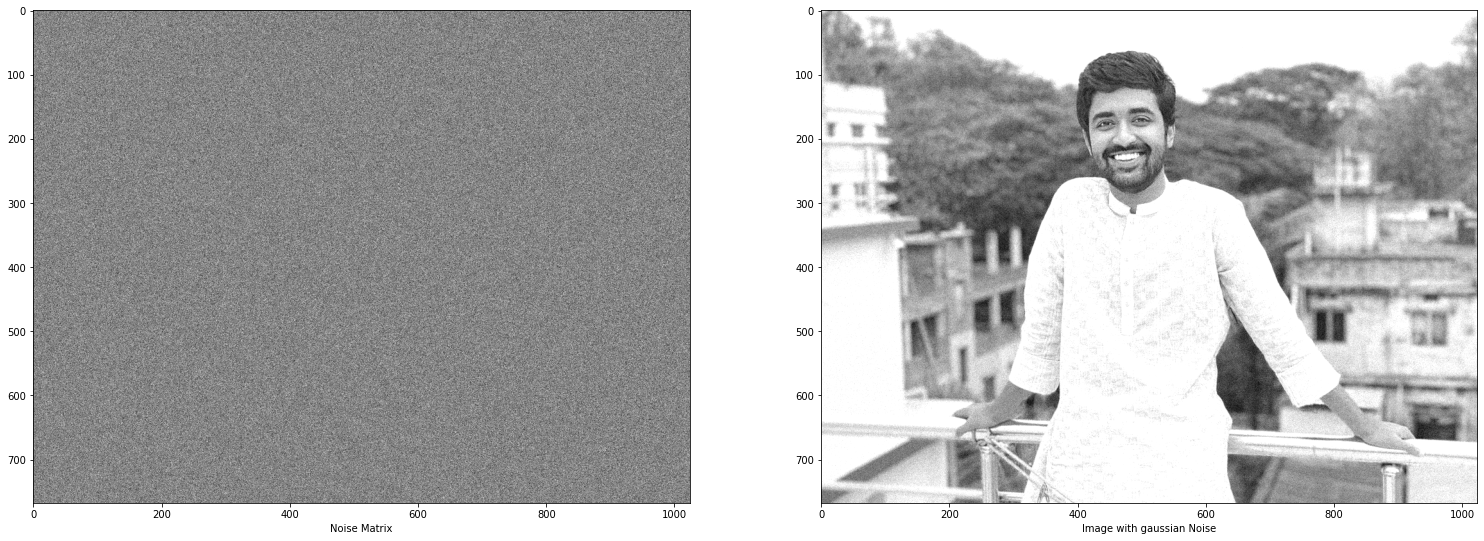

In [24]:
#gaussian noise
#salt-pepper noise
#random/uniform noise


#gaussian noise simulation

gu_n = np.zeros((img.shape[0], img.shape[1]), dtype = np.uint8) 
cv2.randn(gu_n, 128, 20)
gu_n = (gu_n*0.5).astype(np.uint8)
gu_img= cv2.add(img, gu_n)


fig = plt.figure(figsize=(40,40))
gs = GridSpec(row, col)
fig.add_subplot(gs[0,0])
plt.xlabel('Noise Matrix')
plt.imshow(gu_n, cmap='gray')

fig.add_subplot(gs[0,1])
plt.xlabel('Image with gaussian Noise')
plt.imshow(gu_img, cmap='gray')

[[219  36  31 ...  10 254 136]
 [102  19 158 ... 129 236  49]
 [ 37  99 151 ...  53 110 192]
 ...
 [ 41 109  85 ...  62 224 249]
 [114  56 198 ... 175   2  98]
 [156   3  91 ... 249  31 110]]
[[65 10  9 ...  3 76 40]
 [30  5 47 ... 38 70 14]
 [11 29 45 ... 15 33 57]
 ...
 [12 32 25 ... 18 67 74]
 [34 16 59 ... 52  0 29]
 [46  0 27 ... 74  9 33]]
[[241 187 187 ... 246 255 255]
 [200 175 217 ... 255 255 255]
 [170 188 205 ... 255 255 255]
 ...
 [ 97 117 110 ... 199 248 255]
 [119 101 144 ... 232 180 208]
 [131  85 112 ... 253 187 211]]


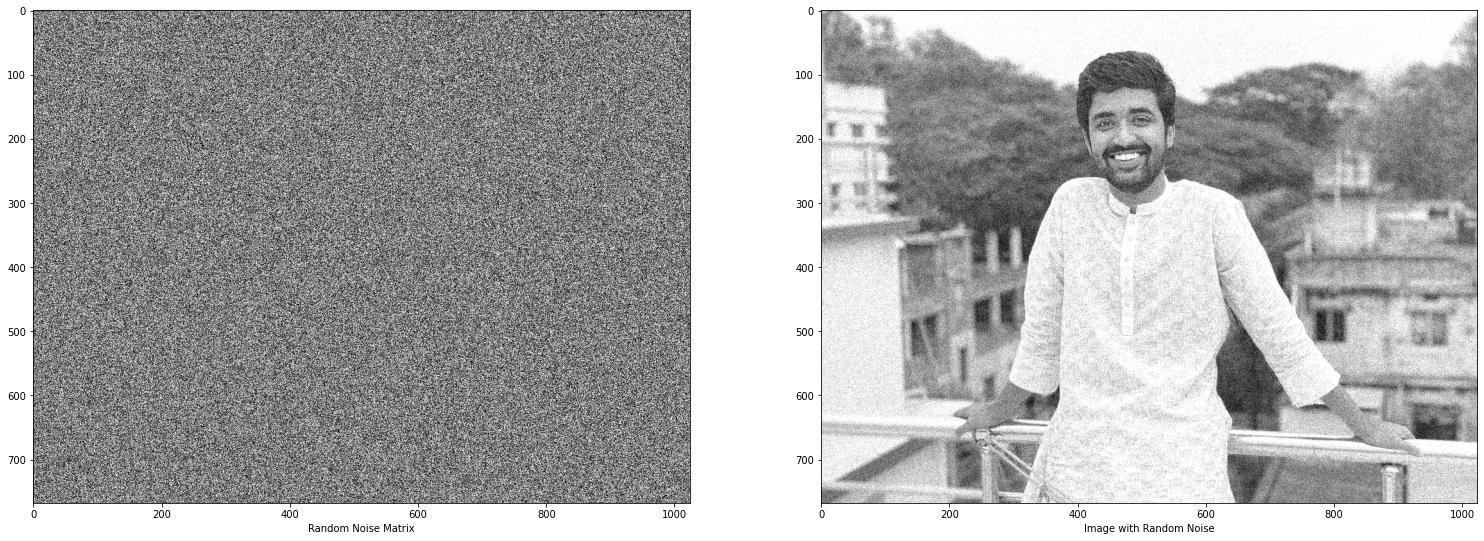

In [25]:
#uniform noise simulation

rand_n = np.zeros((img.shape[0], img.shape[1]), dtype = np.uint8)
cv2.randu(rand_n, 0, 255)
print(rand_n)

rand_n = (rand_n*0.30).astype(np.uint8)
print(rand_n)

rand_n_img= cv2.add(img, rand_n)
print(rand_n_img)

fig = plt.figure(figsize=(40,40))
gs = GridSpec(row, col)
fig.add_subplot(gs[0,0])
plt.xlabel('Random Noise Matrix')
plt.imshow(rand_n, cmap='gray')

fig.add_subplot(gs[0,1])
plt.xlabel('Image with Random Noise')
plt.imshow(rand_n_img, cmap='gray')

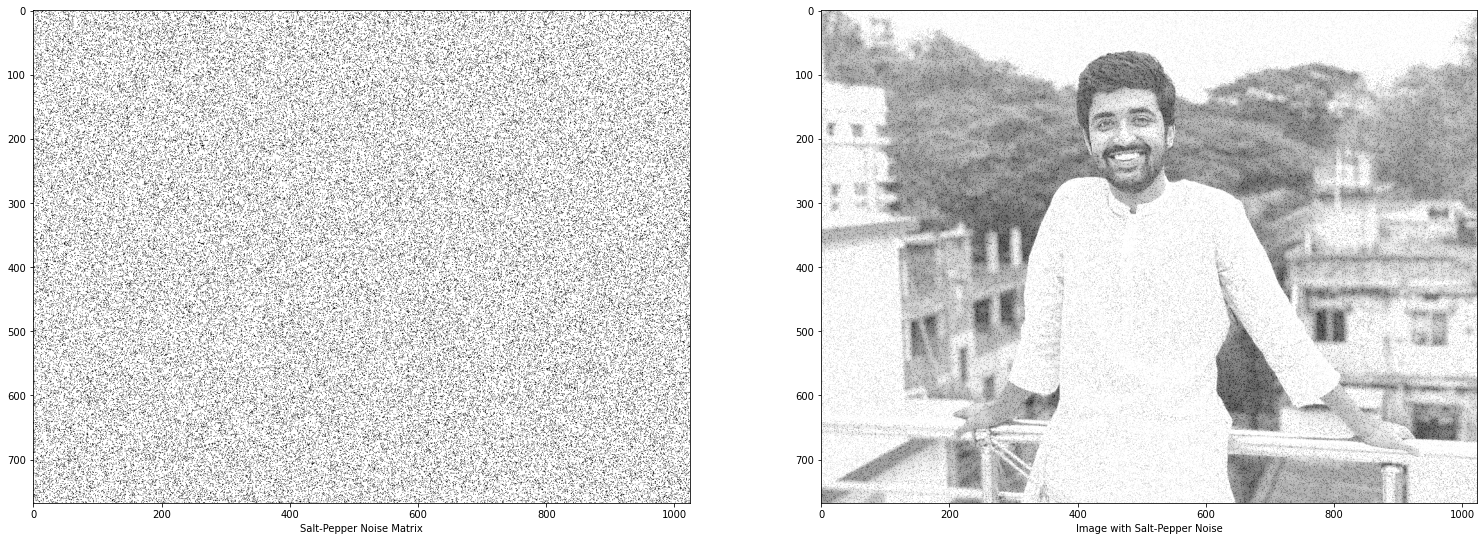

In [26]:
#salt pepper noise simulation

im_n = rand_n.copy()
ret, im_n = cv2.threshold(rand_n, 10, 100, cv2.THRESH_BINARY)
im_n = (im_n*0.8).astype(np.uint8)
im_img = cv2.add(img, im_n)

fig = plt.figure(figsize=(40,40))
gs = GridSpec(row, col)
fig.add_subplot(gs[0,0])
plt.xlabel('Salt-Pepper Noise Matrix')
plt.imshow(im_n, cmap='gray')

fig.add_subplot(gs[0,1])
plt.xlabel('Image with Salt-Pepper Noise')
plt.imshow(im_img, cmap='gray')

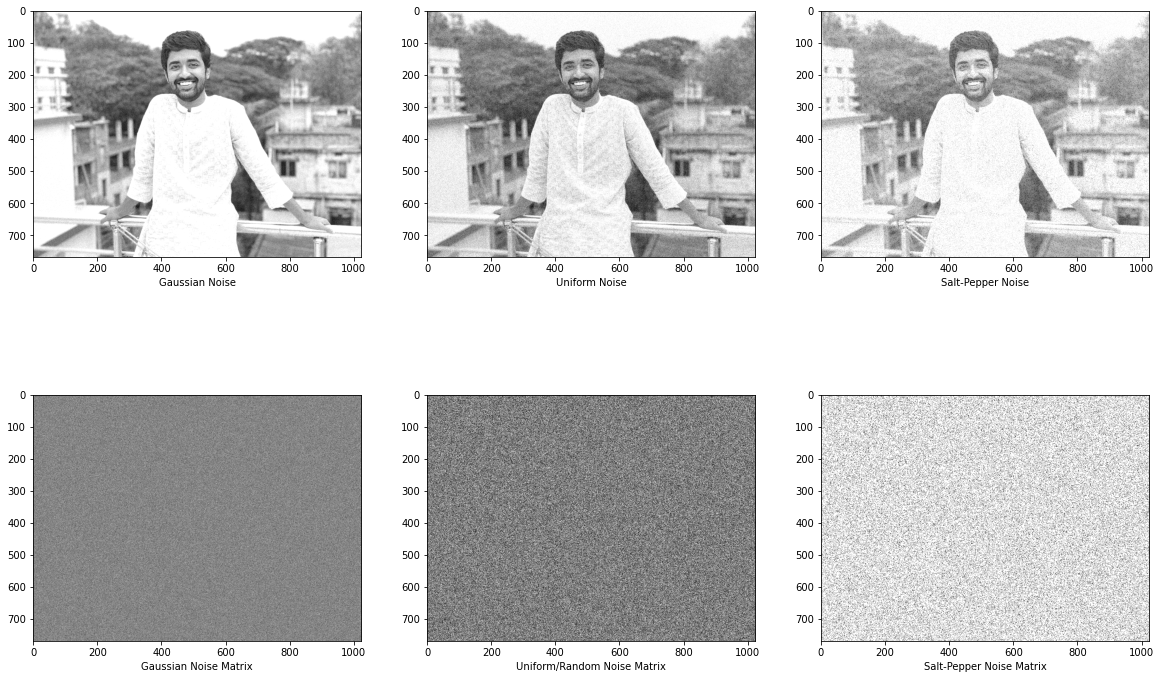

In [27]:
fig = plt.figure(figsize=(20,20))
gs = GridSpec(row, col)

fig.add_subplot(gs[0,0])
plt.xlabel('Gaussian Noise')
plt.imshow(gu_img, cmap='gray')

fig.add_subplot(gs[0,1])
plt.xlabel('Uniform Noise')
plt.imshow(rand_n_img, cmap='gray')

fig.add_subplot(gs[0,2])
plt.xlabel('Salt-Pepper Noise')
plt.imshow(im_img, cmap='gray')

fig.add_subplot(gs[1,0])
plt.xlabel('Gaussian Noise Matrix')
plt.imshow(gu_n, cmap='gray')

fig.add_subplot(gs[1,1])
plt.xlabel('Uniform/Random Noise Matrix')
plt.imshow(rand_n, cmap='gray')

fig.add_subplot(gs[1,2])
plt.xlabel('Salt-Pepper Noise Matrix')
plt.imshow(im_n, cmap='gray')

plt.savefig('2.jpg')

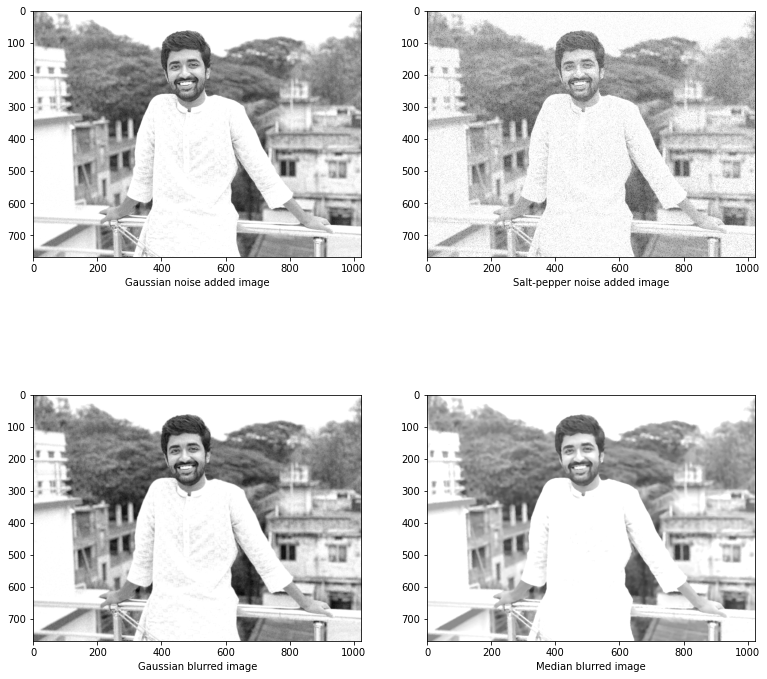

In [28]:
#IMAGE SMOOTHING WITH GAUSSIAN BLUR AND MEDIAN BLUR

gu_sm = cv2.GaussianBlur(gu_img, (3,3), 5)
im_sm = cv2.medianBlur(im_img,5)

fig = plt.figure(figsize=(20,20))
gs = GridSpec(row, col)

fig.add_subplot(gs[0,0])
plt.xlabel('Gaussian noise added image')
plt.imshow(gu_img, cmap='gray')

fig.add_subplot(gs[0,1])
plt.xlabel('Salt-pepper noise added image')
plt.imshow(im_img, cmap='gray')

fig.add_subplot(gs[1,0])
plt.xlabel('Gaussian blurred image')
plt.imshow(gu_sm, cmap='gray')

fig.add_subplot(gs[1,1])
plt.xlabel('Median blurred image')
plt.imshow(im_sm, cmap='gray')

plt.savefig('3.jpg')